# 퍼셉트론 AND GATE

In [1]:
import numpy as np
inputdata = [(0,0),(1,0),(0,1),(1,1)]
outputdata = [0,0,0,1]
# f(x) = x1w1+ x2w2 +  b

In [2]:
inputdata, outputdata

([(0, 0), (1, 0), (0, 1), (1, 1)], [0, 0, 0, 1])

In [3]:
def And(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5 , 0.5])
    b = - 0.7
    temp = np.sum(w*x) + b
    if temp > 0:
        return 1
    else:
        return 0  
    

In [4]:
for x1,x2 in inputdata:
    print(And(x1,x2))

0
0
0
1


In [5]:
def NAnd(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5 , -0.5])
    b =  0.7
    temp = np.sum(w*x) + b
    if temp > 0:
        return 1
    else:
        return 0  

In [6]:
for x1,x2 in inputdata:
    print(NAnd(x1,x2))

1
1
1
0


In [7]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.8 , 0.8])
    b =  -0.7
    temp = np.sum(w*x) + b
    if temp > 0:
        return 1
    else:
        return 0  
    
for x1,x2 in inputdata:
    print(OR(x1,x2))    

0
1
1
1


# 논리회로중에 XOR Gate

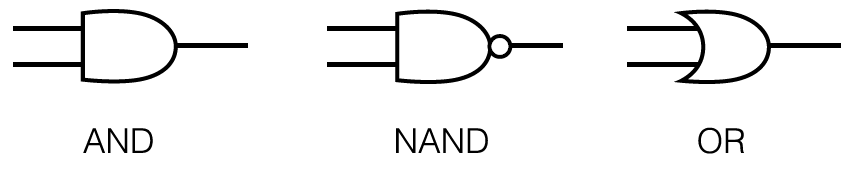

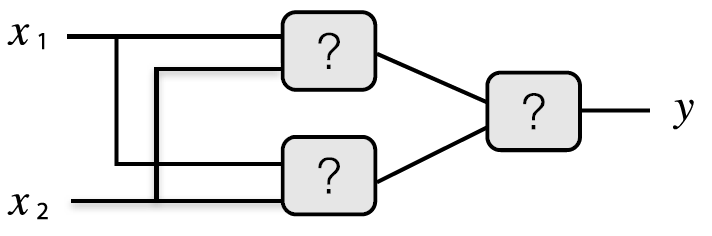

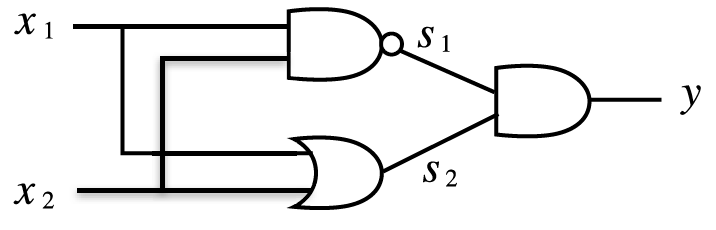

In [8]:
def XOR(x1, x2):
    s1 = NAnd(x1,x2)
    s2 = OR(x1,x2)
    y  = And(s1,s2)
    return y
    
for x1,x2 in inputdata:
    print(XOR(x1,x2))    

0
1
1
0


In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()

# 샘플로 한개 display... 

In [11]:
x_train.shape

(60000, 28, 28)

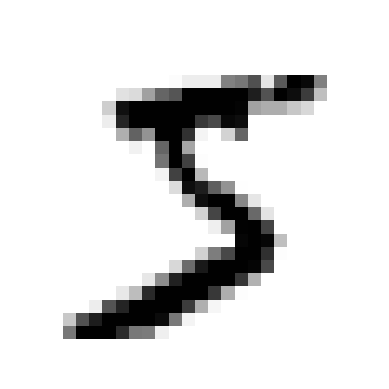

In [12]:
import matplotlib.pylab as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.axis('off')
plt.show()

In [13]:
# 함수로 작성
# 정규화 옵션, one hot encording, flatten 
def loadMnist(nomalize = False, flatten = False, onehotEncording=False):
    # 이미지 정규화  0 ~ 255  
    (x_train,y_train),(x_test,y_test) =  mnist.load_data()
    if nomalize:
        x_train = x_train.astype(np.float32) / 255.0
        x_test = x_test.astype(np.float32) / 255.0
    if flatten:
        x_train = x_train.reshape(-1,28*28)
        x_test  = x_test.reshape(-1,28*28)
    if onehotEncording: 
        result_train_y,result_test_y = [],[]
        for i in y_train:
            t = np.zeros(10)
            t[i] = 1
            result_train_y.append(t)
        for i in y_test:
            t = np.zeros(10)
            t[i] = 1
            result_test_y.append(t)
        y_train = np.array(result_train_y)
        y_test = np.array(result_test_y)
            
    
    return (x_train,y_train),(x_test,y_test)
    

In [14]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()

In [15]:
type(y_train)

numpy.ndarray

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 신경망 구성

In [17]:
def get_data():
    (x_train,y_train),(x_test,y_test) = loadMnist(nomalize=True, flatten=True)
    return (x_train,y_train),(x_test,y_test)

In [18]:
import pickle

In [19]:
def init_newtwork():
    with open('sample_weight.pkl','rb') as f:
        net = pickle.load(f)
    return net

In [20]:
with open('sample_weight.pkl','rb') as f:
    net = pickle.load(f)
net.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

# 시그모이드
# 활성함수  : 신호를 activate 시키는 활동..-> 1이 되어서 다음 신경망(네트웍, 층)으로 전달
# 계단함수 구현 : 신호를 받아서 0보다 크면 1  그렇지 않으면 0리턴하는 함수

In [21]:
def stepFunction(x):
    return np.int16( np.array(x)>0)
    

In [22]:
result = [
    [-1,2],[-3,4]
]
stepFunction(result)


array([[0, 1],
       [0, 1]], dtype=int16)

### 미니배치

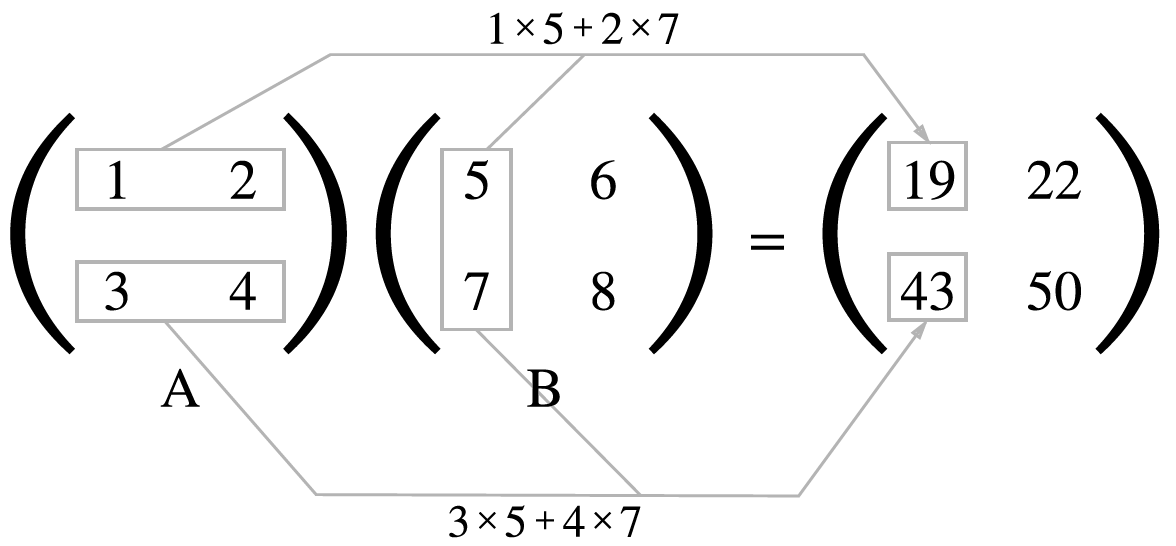

In [23]:
# 미니배치가 10 입력데이터가 2

In [24]:
x1 = np.random.randn(10,2)
x1

array([[-1.71771794,  0.23270337],
       [ 1.87158291, -0.1598386 ],
       [ 1.98693183, -0.19841168],
       [-0.12057036,  0.07180503],
       [-0.64598744,  0.04386721],
       [-1.0154778 ,  0.92173234],
       [ 1.223667  , -1.2760632 ],
       [ 0.85268331,  0.16783287],
       [ 0.26399061,  1.38978045],
       [ 1.54663787, -0.83203255]])

In [25]:
# hidden1  : output 4

In [26]:
w1 = np.random.randn(2,4)
w1

array([[ 0.70814804, -0.46912118,  1.25625426, -0.3421112 ],
       [ 0.18383375, -0.13088064,  1.50777465, -0.13320032]])

In [27]:
b1 = np.random.randn(4)
b1

array([ 1.55585612, -0.48873815,  2.06702589,  0.76383915])

# 출력층

In [28]:
w2 = np.random.randn(4,3)
w2

array([[-2.60226232,  0.04537331, -3.43491719],
       [ 0.97952557, -0.4903904 ,  1.01596002],
       [-0.77558833, -0.40705509, -0.13846676],
       [-0.07754812, -0.64038712,  0.83719748]])

In [29]:
b2 = np.random.randn(3)

In [30]:
h = np.matmul(x1,w1) + b1
h.shape

(10, 4)

# 시그 모이드 함수
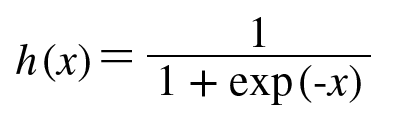

In [31]:
# 비선형 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# 이전만든 stepFuncton  선형 함수

In [32]:
h1 = sigmoid(h)
h1

array([[0.59441235, 0.57116927, 0.56463621, 0.7892638 ],
       [0.94541321, 0.20655499, 0.98489054, 0.53614689],
       [0.94913728, 0.19862956, 0.9861286 , 0.52760092],
       [0.81512697, 0.391366  , 0.88327591, 0.68901603],
       [0.75146961, 0.45228734, 0.78945498, 0.72690887],
       [0.73227446, 0.46680069, 0.89853869, 0.7287857 ],
       [0.89914949, 0.28991966, 0.84293724, 0.62602023],
       [0.89939637, 0.28685334, 0.96743049, 0.61058485],
       [0.88061733, 0.31120816, 0.98894921, 0.61973081],
       [0.92401196, 0.24872913, 0.94022202, 0.5855366 ]])

In [33]:
output = np.matmul(h1,w2) + b2
output

array([[-2.62028138, -0.29388819, -0.79156867],
       [-4.19714232, -0.10813263, -2.63776119],
       [-4.214894  , -0.09910833, -2.66593108],
       [-3.61011985, -0.26120637, -1.86042626],
       [-3.31496479, -0.28004575, -1.53515998],
       [-3.33554736, -0.33363889, -1.46801442],
       [-3.89196637, -0.15088392, -2.29925644],
       [-3.99097087, -0.19016001, -2.33338034],
       [-3.93564562, -0.21757171, -2.23945501],
       [-4.06932571, -0.14323146, -2.47386838]])

In [34]:
# 2층짜리 넥트웍(신경망)을 구현
class Sigmoid:
    def __init__(self):
        self.params = []
    def forward(self, x):
        return 1 / (1 + np.exp(-x))            

In [35]:
class LinearClass:
    def __init__(self,w,b):
        self.params = [w,b]
    def forward(self, x):
        w,b = self.params
        out = np.matmul(x,w)+b
        return out

In [36]:
class MlptwoLayer:
    def __init__(self,input_size, hiden_size,out_size):
        # 가중치, 바이어스를 초기화
        w1 = np.random.randn(input_size,hiden_size)
        b1 = np.random.randn(hiden_size)
        w2 = np.random.randn(hiden_size,out_size)
        b2 = np.random.randn(out_size)
        
        # 레이어 생성
        self.layer = [
            LinearClass(w1,b1),
            Sigmoid(),
            LinearClass(w2,b2)
        ]
        
        # 가중치 저장
        self.params = []
        for layer in self.layer:
            self.params += layer.params
        
    def predict(self,x):
        for layer in self.layer:
            x = layer.forward(x)
        return x

In [38]:
x = np.random.randn(5,2)
x

array([[ 0.95141944,  0.37955971],
       [ 1.10567031, -0.44588199],
       [ 0.45622001, -0.43365572],
       [-1.86452684, -0.53434507],
       [-1.58331896,  0.5959709 ]])

In [39]:
model = MlptwoLayer(2 , 4, 3)
p = model.predict(x)
p

array([[ 1.7665721 , -1.70719256, -0.99769477],
       [ 1.21647767, -1.41760164, -1.2389647 ],
       [ 1.00694086, -1.47023447, -1.73372347],
       [ 0.3218981 , -1.47921099, -2.89627046],
       [ 1.10628967, -1.97341938, -2.58054515]])

In [45]:
# Relu함수 정의
def relu(x):
    return np.maximum(0,x)

(0.0, 2.5)

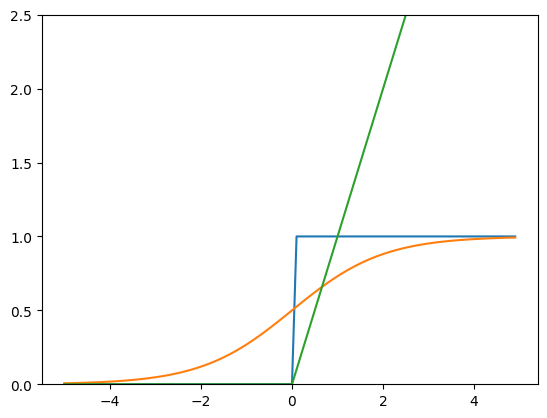

In [48]:
# 활성화 함수의 시각화 ( 계단함수, 시그모이드)
import matplotlib.pyplot as plt
x = np.arange(-5.0,5.0,0.1)
y1 = stepFunction(x)
y2 = sigmoid(x)
y3 = relu(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.ylim(0,2.5)

In [41]:
# 퍼셉트론은 0과 1로 되어 있다.
# 신경망... 연속적인 값이 흐르는 구조
# Relu 가 등장

In [44]:
x = np.random.randn(1,5)
print(x)
np.maximum(0, x)

[[-0.19266201 -1.83227262 -0.3750591   0.10764698 -1.10059817]]


array([[0.        , 0.        , 0.        , 0.10764698, 0.        ]])

In [53]:
# 1차원 배열을 만들고 이름을 A  np.shape(A)  (4,)
# np.dim(A)
A = np.array([1,2,3,4])
A.shape
np.ndim(A)

1

In [63]:
# 2차원 배열을 만들어서 이름을 B라고 하고 np.dim(B)  (3,2)  np.dim(B)
B = np.array([
    [1,2],
    [2,2],
    [3,2]
])
B.shape
np.zeros(6).reshape(3,2)
np.ndim(B)

2

In [ ]:
# 아래 그림처럼 넘파이 배열 만들어서 계산하기

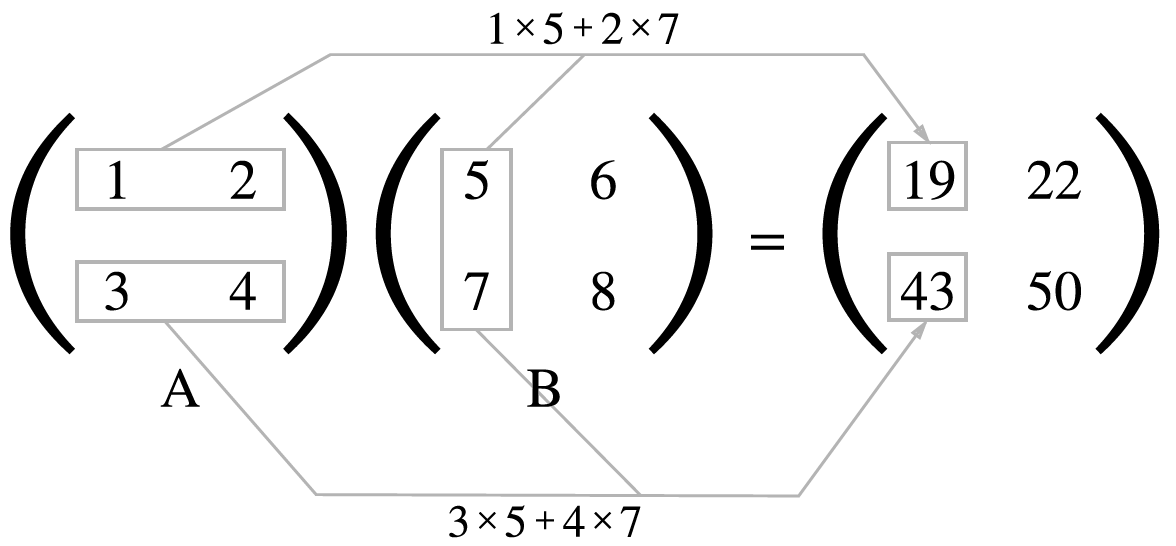

In [69]:
A = np.arange(1,5).reshape(2,2)
B = np.arange(5,9).reshape(2,2)
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [70]:
# (3,2)  (2,4)  = (3,4)

In [ ]:
# (3,2)  2  = 3

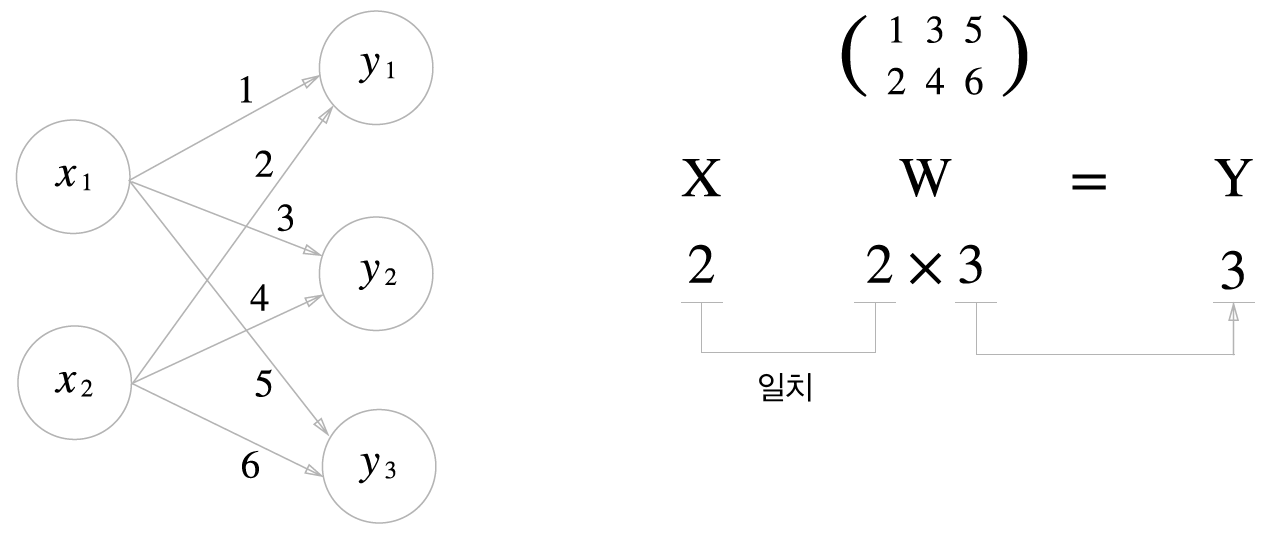

In [76]:
x = np.array([1,2])
x.shape
w = np.array([
    [1,3,5]
    ,[2,4,6]
])
w.shape
y = np.matmul(x,w)
y

array([ 5, 11, 17])

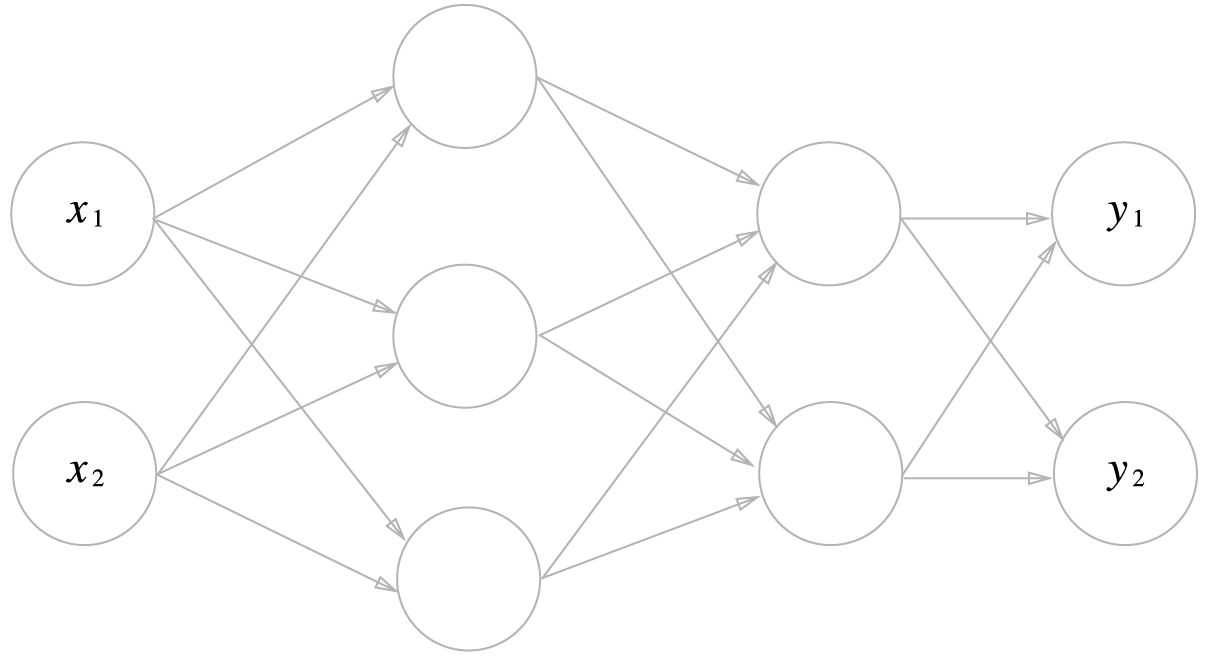

In [77]:
# 위의 그림을 완성해주세요  이때 순수히 신경망의 동작을 이해하는데 집중... 바이어스와 활성화 함수등은 생략

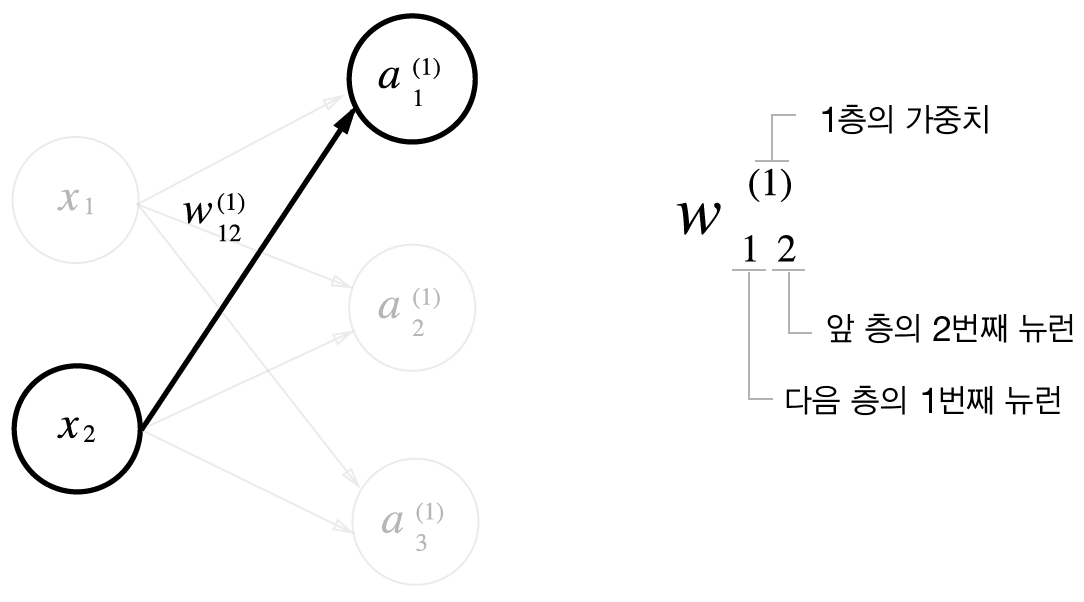

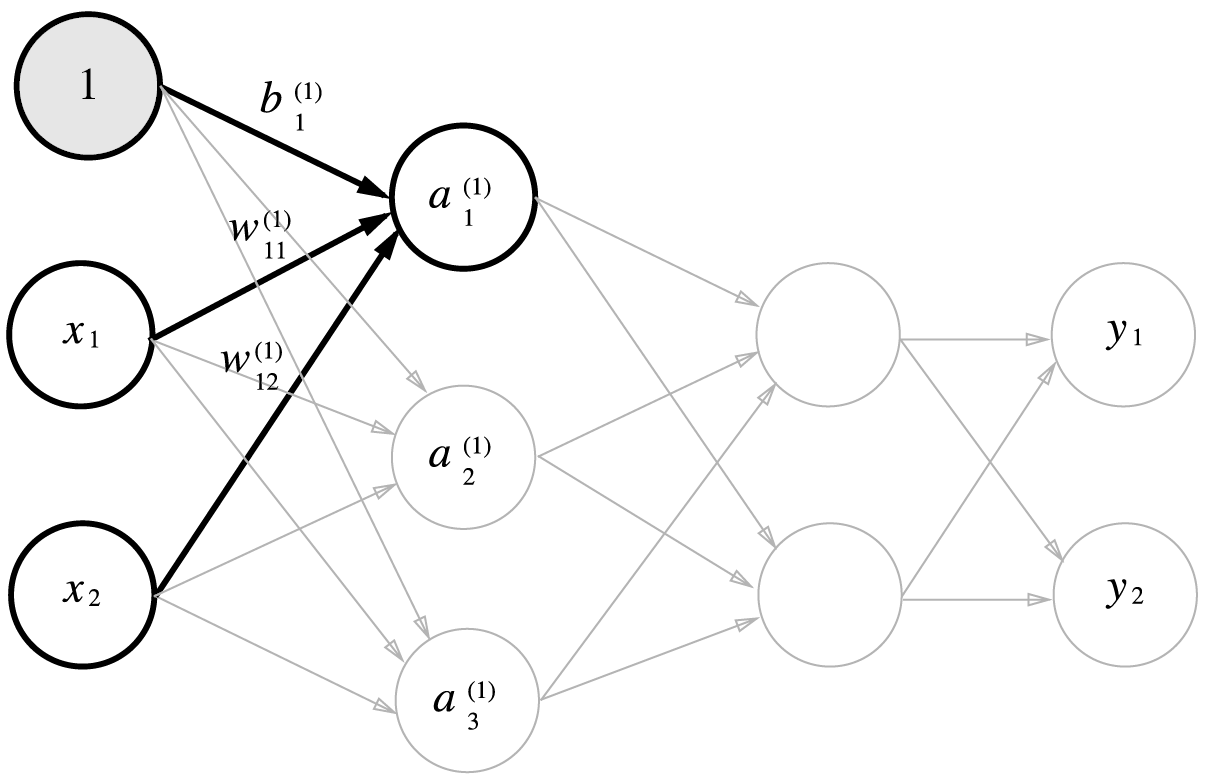

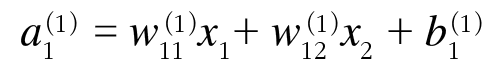

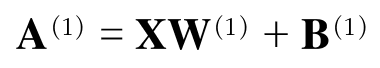

In [78]:
x = np.array([1.0,0.5])
w1 = np.array([
    [0.1,0.2,0.3],[0.4,0.5,0.6]
])
b1 = np.array([0.1,0.2,0.3])
a1 = np.matmul(x,w1) + b1
a1

array([0.4 , 0.65, 0.9 ])

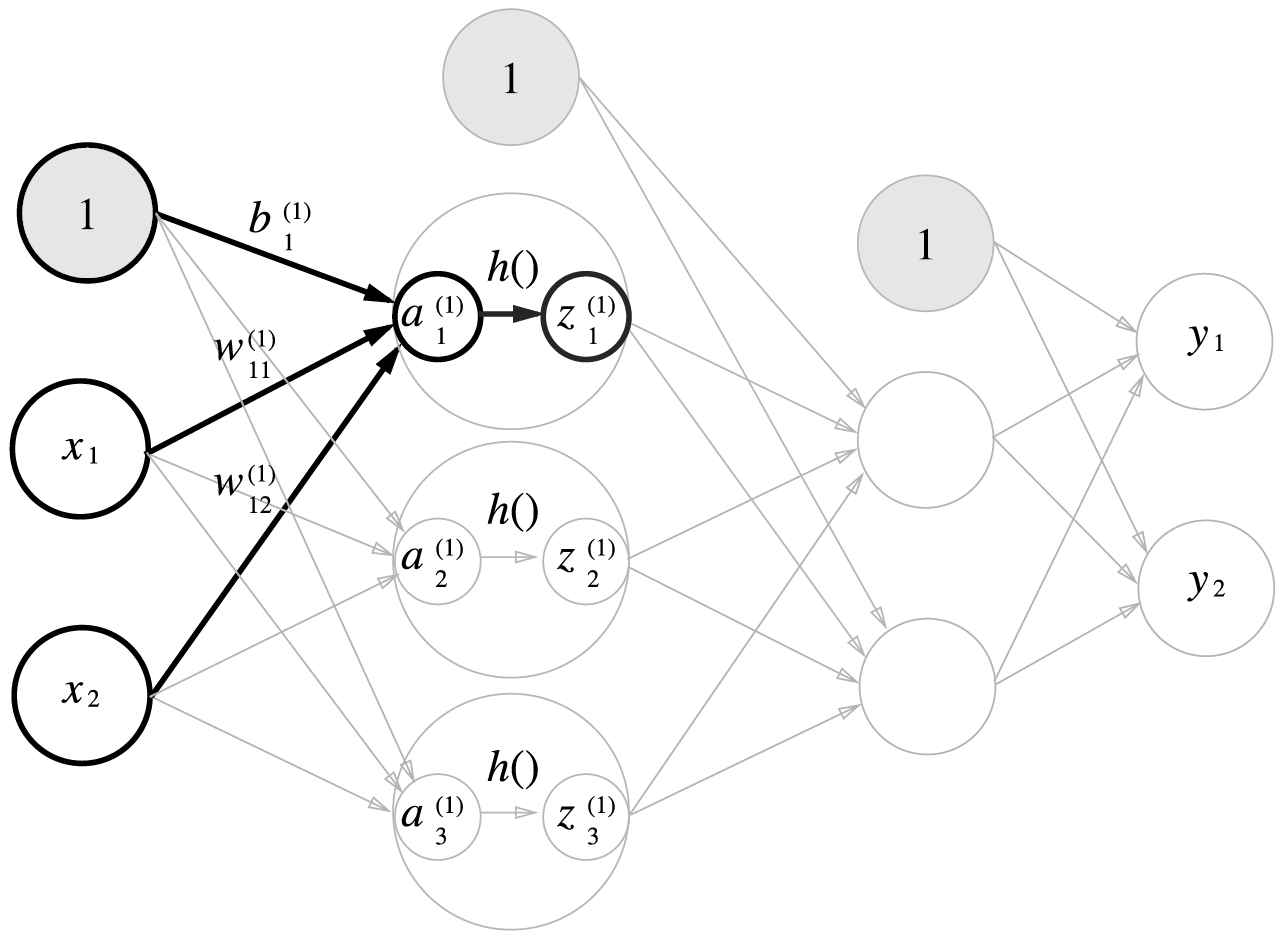

In [79]:
# h() 활성화 함수.... 시그모이드

In [80]:
z1 = sigmoid(a1)
z1

array([0.59868766, 0.65701046, 0.7109495 ])

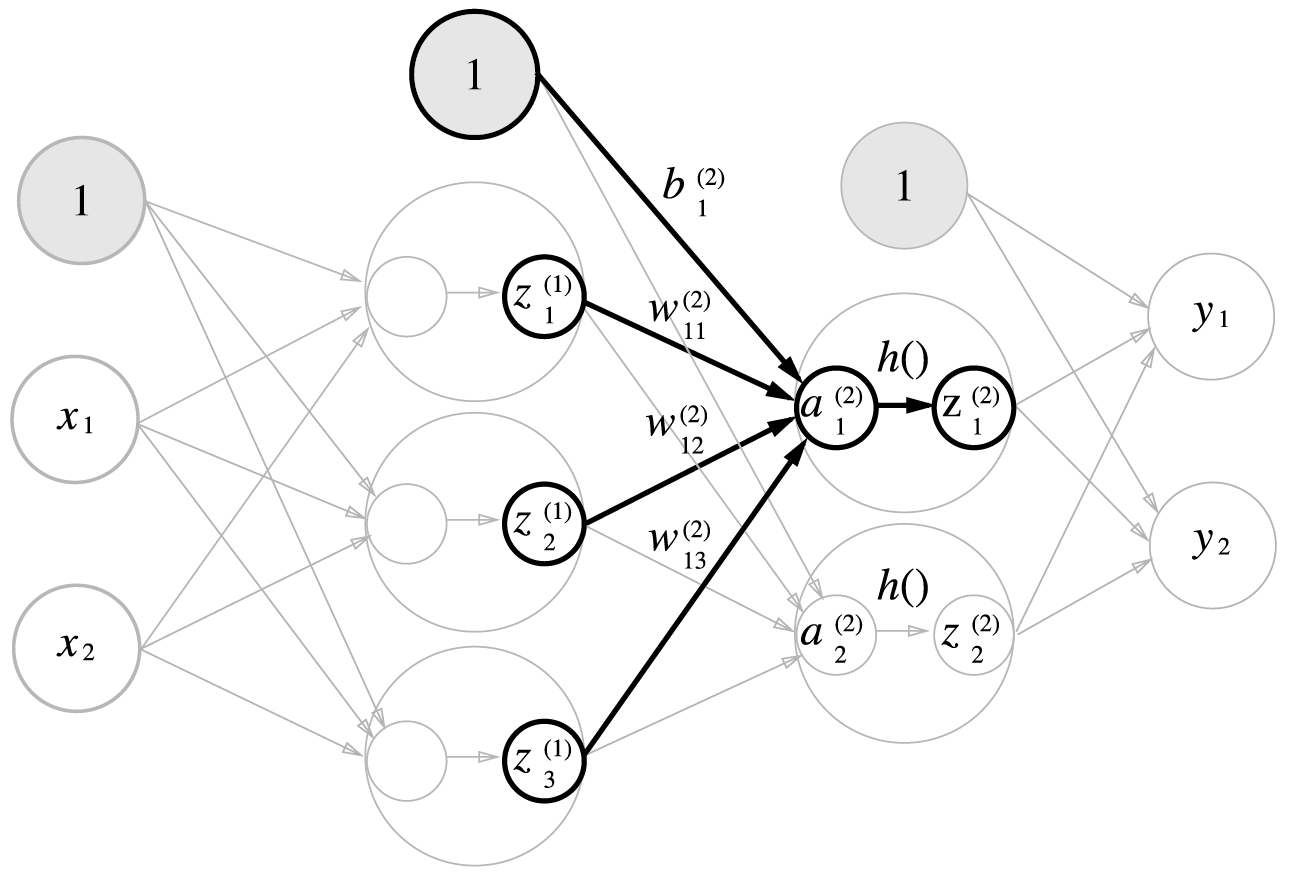

In [84]:
w2 = np.random.randn(3,2)
b2 = np.random.randn(2)
w2,b2

(array([[ 1.05904773, -0.31567552],
        [-0.98327409, -0.32751385],
        [ 0.73404364,  0.32251733]]),
 array([ 1.30399678, -0.1093851 ]))

In [86]:
a2 = np.dot(z1,w2)+b2
print(a2)
z2 = sigmoid(a2)
z2

[ 1.81388219 -0.28426263]


array([0.85983042, 0.42940905])

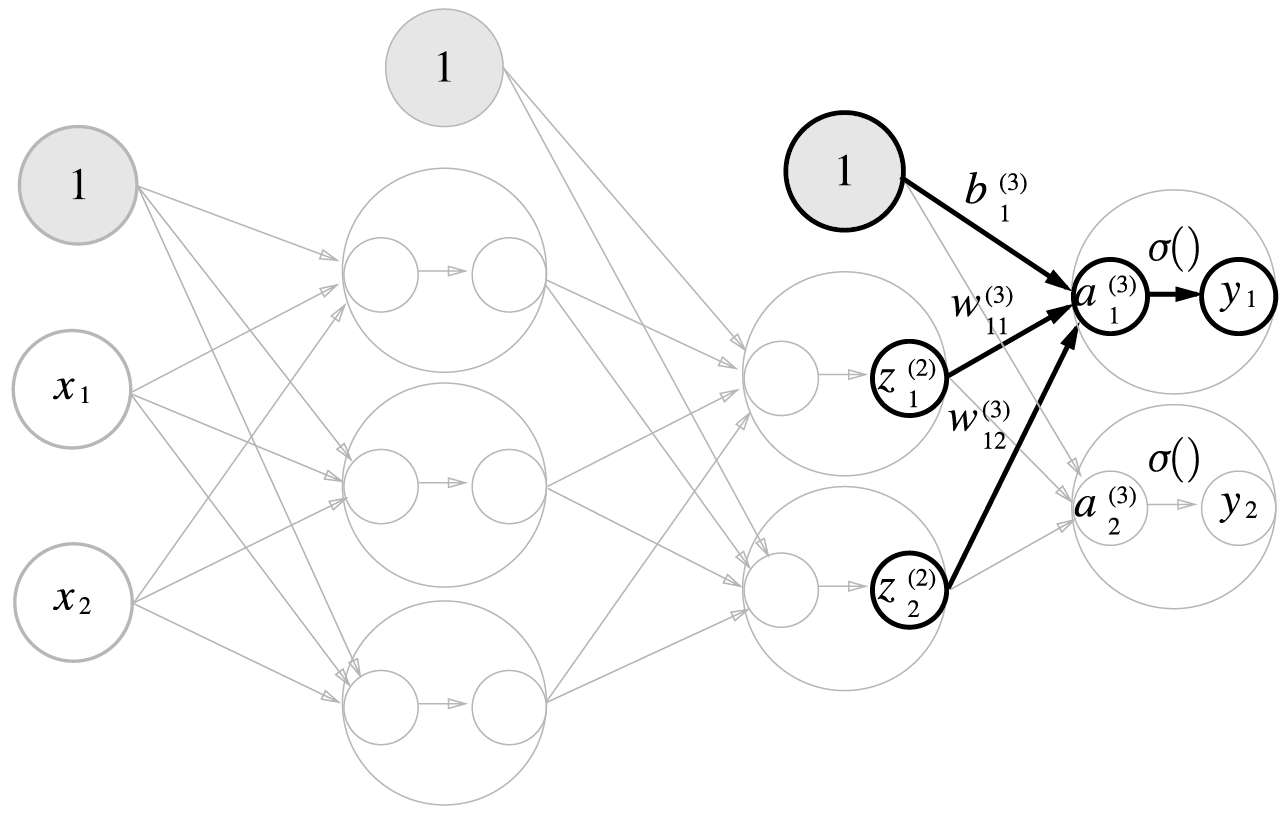

In [87]:
# 항등함수 : 출력층의 활성화 함수
def identify_fun(x):
    return x

In [88]:
w3 = np.random.randn(2,2)
b3 = np.random.randn(2)
z3 = np.dot(z2,w3) + b3
z3

array([2.01809149, 1.11407889])

In [89]:
output = identify_fun(z3)
output

array([2.01809149, 1.11407889])

In [92]:
def init_net():
    network = {}
    network['w1'] = np.random.randn(2,3)
    network['b1'] = np.random.randn(3)
    network['w2'] = np.random.randn(3,2)
    network['b2'] = np.random.randn(2)
    network['w3'] = np.random.randn(2,2)
    network['b3'] = np.random.randn(2)
    return network
def forward(network, x):
    w1,w2,w3 =  network['w1'],network['w2'],network['w3']
    b1,b2,b3 =  network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,w1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3)+b3
    y = identify_fun(a3)
    return y   
    

In [93]:
network = init_net()
x = np.array([1.5,2.5])
y = forward(network, x)
y

array([0.68158208, 0.35505242])

In [94]:
# 출력층

In [95]:
# 회귀 분류..  
# 회귀 : 항등함수
# 분류 : 소프트맥스

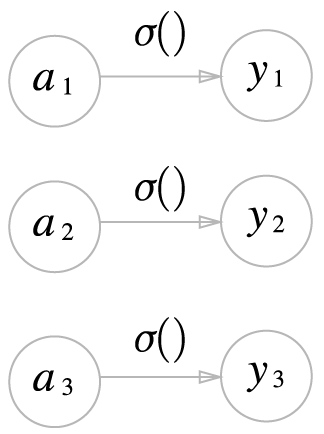

In [96]:
# 소프트 맥스

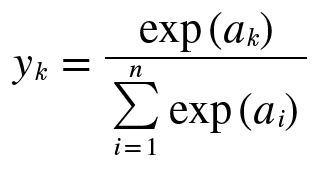

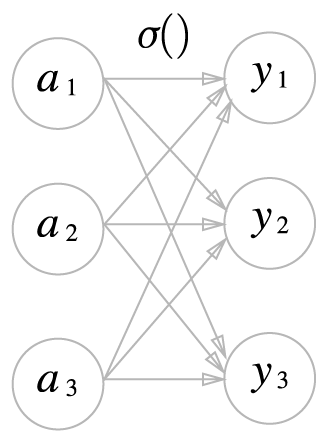

In [97]:
# 소프트 맥스의출력은 모든 입력신호로부터 화살표를 받는다

In [98]:
a = np.array([0.3,2.5,3.1])
exp = np.exp(a) # 지수함수
exp

array([ 1.34985881, 12.18249396, 22.19795128])

In [99]:
exp_sum = np.sum(exp)
exp_sum

35.73030404972111

In [100]:
y = exp / exp_sum
y

array([0.0377791 , 0.34095691, 0.62126399])

In [101]:
def softmax(x):
    exp = np.exp(x)
    exp_sum = np.sum(exp)
    return exp / exp_sum

In [105]:
softmax([120,250,255])

array([2.32985291e-59, 6.69285092e-03, 9.93307149e-01])

In [104]:
# 소프트맥스 개선

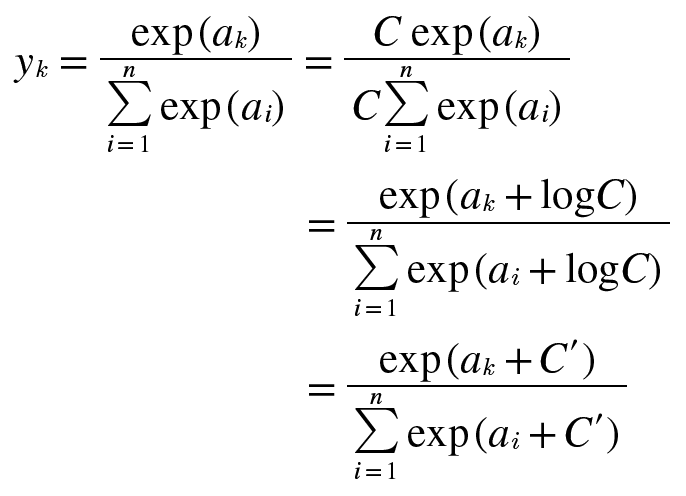

In [110]:
a = np.array([1010,1000,990])
c = np.max(a) # 최대값
a- c
softmax(a-c)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [111]:
def softmax(x):
    c = np.max(x)
    exp = np.exp(x - c)  # 오버플로우 방지
    exp_sum = np.sum(exp)
    return exp / exp_sum

In [114]:
# 특징  합은 1..   0 과 1사이의 실수값을 리턴  -> 확률로 해석
softmax([1,2,3,4,5,8]).sum()

1.0000000000000002

In [115]:
# 출력층의 뉴런수 : 분류하고자 하는 클래스 수

In [116]:
# 손글씨... 
# 학습과정은 생략  추론만 구현..... -> 순전파.. forward propagation

In [117]:
# 손글씨 데이터 가져오기

In [119]:
from tensorflow.keras.datasets import mnist

In [121]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [122]:
def init_network():
    with open('sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network


In [124]:
init_network().keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [156]:
def predict(network, x):
    w1,w2,w3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    # 각 뉴런의  활성화함수는 시그모이드
    # 출력층의 활성함수는 소프트맥스
    a1 = np.dot(x,w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3) + b3
    y = softmax(a3)        
    return y

In [127]:
# 평가  :  정확도

In [147]:
network = init_network()
network['W1'].shape,network['W3'].shape

((784, 50), (100, 10))

In [163]:
# 전체데이터를 사용
from tqdm import tqdm
accuracy = 0
for i in tqdm(range(len(x_train))):
    data = x_train[i] / 255. 
    data = data.reshape(-1,28*28)
    y = predict(network,data)
    yy =  np.argmax(y, axis=1)
    if yy == y_train[i]:
        accuracy+=1
        
accuracy / len(y_train)
    
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:05<00:00, 10073.09it/s]


0.9357666666666666

In [159]:
y_test[0]

7

In [166]:
# 배치 처리
w1,w2,w3 = network['W1'],network['W2'],network['W3']

In [167]:
x_train.shape,w1.shape, w2.shape, w3.shape 

((60000, 28, 28), (784, 50), (50, 100), (100, 10))

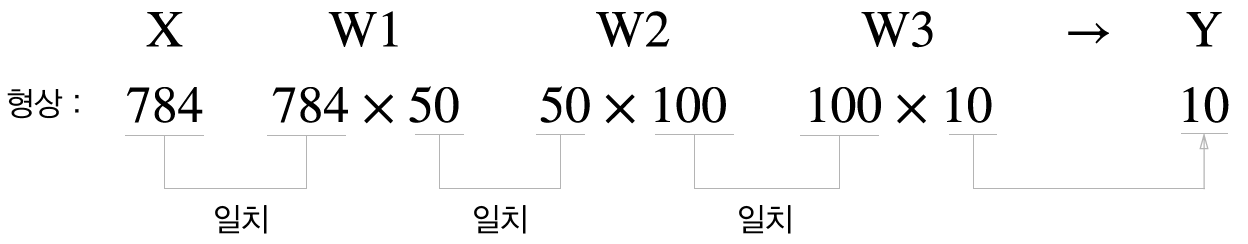

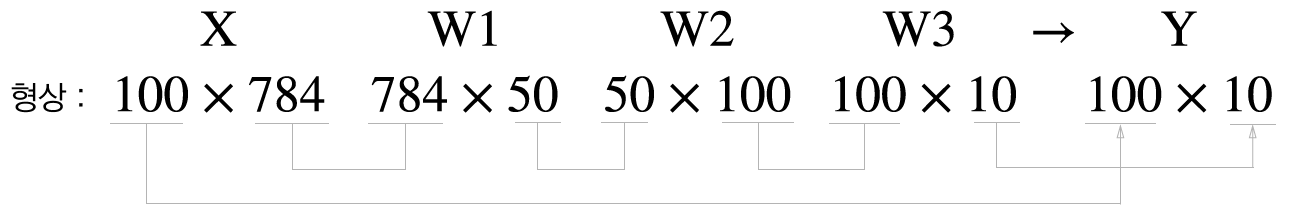

In [178]:
# 배치사이즈 단위로 추론(처리)
from tqdm import tqdm
batch_size = 100
accuracy = 0
for i in tqdm(range(0, len(x_train), batch_size )):
    x_batch = x_train[i : i+batch_size ] / 255. 
    x_batch = x_batch.reshape(-1,28*28)
    y = predict(network,x_batch)
    yy =  np.argmax(y, axis=1)    
    accuracy+=np.sum(yy == y_train[i : i+batch_size])
        
accuracy / len(y_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 2125.48it/s]


0.9357666666666666

In [184]:
A = np.array([0,1,1,1,0,0,1])
B = np.array([0,0,0,0,0,1,1])
(A == B).sum()
    

3

In [185]:
# 신경망의 순전파 forward propagation